In [2]:
import pandas as pd
import numpy as np
    

df1 = pd.read_csv("./Combined_News_DJIA.csv")
df2 = pd.read_csv("./upload_DJIA_table.csv")
df2.head()
     

df = df1.merge(df2, left_on='Date', right_on='Date')
df.drop(['High','Low','Volume', 'Adj Close', 'Label', 'Close'], axis=1, inplace=True)
df.drop(list(['Top'+str(i) for i in range(11,26)]), axis=1, inplace=True)
df['combined_news'] = df['Top1']
for i in range(2,10):
  df['combined_news'] = df['combined_news'] + df['Top'+str(i)] 

df.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Open,combined_news
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',11432.089844,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",11729.669922,b'Why wont America and Nato help us? If they w...
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',11781.700195,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...","b""92% of CNN readers: Russia's actions in Geor...",11632.809570,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",b'Russia exaggerating South Ossetian death tol...,b' Musharraf expected to resign rather than fa...,11532.070312,b'All the experts admit that we should legalis...


In [3]:
df = df.drop(list(['Top'+str(i) for i in range(1,11)]),axis=1)
df.head()

,Date,Open,combined_news
0,2008-08-08,11432.089844,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,11729.669922,b'Why wont America and Nato help us? If they w...
2,2008-08-12,11781.700195,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,11632.809570,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,11532.070312,b'All the experts admit that we should legalis...


In [4]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
  return model(input)

logging.set_verbosity(logging.ERROR)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [14]:
def get_prev_lstm(df, feature_list, prev_steps, target):
  matrix = []
  for i in range(len(df[feature_list[0]])-1, prev_steps, -1):
    to_add=[df[target][i]]
    for feature in feature_list:
      for j in range(1,prev_steps+1):
        day=df[feature][i-j]
        to_add.append(day)
    matrix.append(to_add)
  return matrix


In [18]:
new_df = pd.DataFrame(get_prev_lstm(df, ['Open','combined_news'], 4, 'Open'))
new_df.head()

,0,1,2,3,4,5,6,7,8
0,17924.240234,17712.759766,17456.019531,17190.509766,17355.210938,Jamaica proposes marijuana dispensers for tour...,Explosion At Airport In IstanbulYemeni former ...,"2,500 Scientists To Australia: If You Want To ...",Barclays and RBS shares suspended from trading...
1,17712.759766,17456.019531,17190.509766,17355.210938,17946.630859,Explosion At Airport In IstanbulYemeni former ...,"2,500 Scientists To Australia: If You Want To ...",Barclays and RBS shares suspended from trading...,David Cameron to Resign as PM After EU Referen...
2,17456.019531,17190.509766,17355.210938,17946.630859,17844.109375,"2,500 Scientists To Australia: If You Want To ...",Barclays and RBS shares suspended from trading...,David Cameron to Resign as PM After EU Referen...,Today The United Kingdom decides whether to re...
3,17190.509766,17355.210938,17946.630859,17844.109375,17832.669922,Barclays and RBS shares suspended from trading...,David Cameron to Resign as PM After EU Referen...,Today The United Kingdom decides whether to re...,German government agrees to ban fracking indef...
4,17355.210938,17946.630859,17844.109375,17832.669922,17827.330078,David Cameron to Resign as PM After EU Referen...,Today The United Kingdom decides whether to re...,German government agrees to ban fracking indef...,An Australian athlete who has competed in six ...


In [20]:
new_df['combined_prev'] = new_df[5] + new_df[6] + new_df[7] + new_df[8]

In [61]:
message_embeddings = embed(new_df.combined_prev.values)
len(message_embeddings)

1984

In [34]:
new_df.iloc[0,5]

"Jamaica proposes marijuana dispensers for tourists at airports following legalisation: The kiosks and desks would give people a license to purchase up to 2 ounces of the drug to use during their stayStephen Hawking says pollution and 'stupidity' still biggest threats to mankind: we have certainly not become less greedy or less stupid in our treatment of the environment over the past decadeBoris Johnson says he will not run for Tory party leadershipSix gay men in Ivory Coast were abused and forced to flee their homes after they were pictured signing a condolence book for victims of the recent attack on a gay nightclub in FloridaSwitzerland denies citizenship to Muslim immigrant girls who refused to swim with boys: reportPalestinian terrorist stabs israeli teen girl to death in her bedroomPuerto Rico will default on $1 billion of debt on FridayRepublic of Ireland fans to be awarded medal for sportsmanship by Paris mayor.Afghan suicide bomber 'kills up to 40' - BBC News"

In [62]:
message_embeddings = np.array(message_embeddings)

In [63]:
expanded = []
for i in range(len(message_embeddings)):
  expanded.append(np.append(message_embeddings[i],[new_df.iloc[i,1], new_df.iloc[i,2], new_df.iloc[i,3], new_df.iloc[i,4], new_df.iloc[i,0]]))

In [64]:
expanded = pd.DataFrame(expanded)
expanded.head()

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
0,-0.042708,-0.057917,-0.006389,0.001701,0.007244,0.035539,0.006980,-0.053870,-0.045055,-0.055668,...,-0.058619,-0.046966,0.048486,-0.058644,-0.058731,17712.759766,17456.019531,17190.509766,17355.210938,17924.240234
1,-0.042063,-0.058615,-0.042968,-0.005198,0.024337,0.052984,-0.016092,-0.052987,0.017254,-0.043700,...,-0.058635,-0.035010,0.057131,-0.058684,-0.058728,17456.019531,17190.509766,17355.210938,17946.630859,17712.759766
2,-0.044333,-0.056978,-0.036978,-0.000319,-0.012620,0.053863,-0.042790,-0.053949,-0.032810,-0.050328,...,-0.058057,-0.039611,0.056220,-0.058072,-0.058190,17190.509766,17355.210938,17946.630859,17844.109375,17456.019531
3,-0.044654,-0.040580,-0.049686,-0.019066,-0.024804,0.051806,-0.040678,-0.049427,-0.022560,-0.047030,...,-0.057560,-0.026730,0.056255,-0.057687,-0.057770,17355.210938,17946.630859,17844.109375,17832.669922,17190.509766
4,-0.038572,-0.028022,-0.051567,-0.051605,-0.015292,0.006587,0.020422,-0.046930,0.000163,-0.047274,...,-0.056177,-0.035517,0.053522,-0.055405,-0.056417,17946.630859,17844.109375,17832.669922,17827.330078,17355.210938


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(expanded.drop([516],axis=1), expanded[516], test_size=0.2 )

In [77]:
X_train = np.reshape(np.array(X_train), (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], 1, X_test.shape[1]))

In [78]:
X_train.shape

(1587, 1, 516)

In [79]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [83]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,516), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [84]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, shuffle=False, validation_split=0.2, epochs=50, batch_size=16)

Epoch 1/50
80/80 [==============================] - 3s 12ms/step - loss: 128412448.0000 - mean_absolute_error: 10801.7412 - val_loss: 26321756.0000 - val_mean_absolute_error: 5013.5044
Epoch 2/50
80/80 [==============================] - 1s 9ms/step - loss: 2276995.7500 - mean_absolute_error: 875.2633 - val_loss: 30111.8027 - val_mean_absolute_error: 132.3306
Epoch 3/50
80/80 [==============================] - 1s 9ms/step - loss: 32409.7051 - mean_absolute_error: 131.0951 - val_loss: 29077.4219 - val_mean_absolute_error: 127.6648
Epoch 4/50
80/80 [==============================] - 1s 9ms/step - loss: 32431.9473 - mean_absolute_error: 131.6702 - val_loss: 29078.0723 - val_mean_absolute_error: 127.6830
Epoch 5/50
80/80 [==============================] - 1s 9ms/step - loss: 32446.1465 - mean_absolute_error: 131.6460 - val_loss: 29106.2051 - val_mean_absolute_error: 127.8451
Epoch 6/50
80/80 [==============================] - 1s 9ms/step - loss: 32461.8574 - mean_absolute_error: 131.6531 - 

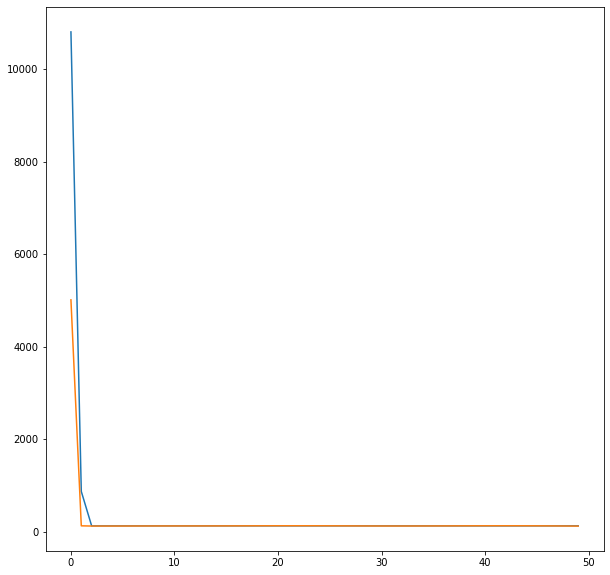

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [86]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 5ms/step - loss: 23830.3066 - mean_absolute_error: 116.9439


[23830.306640625, 116.94385528564453]

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(expanded.drop([516],axis=1), expanded[516], test_size=0.2 )

In [88]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, max_depth=5)

xgb.fit(X_train, y_train)

[12:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, n_estimators=200)

In [89]:
from sklearn.metrics import mean_absolute_error

y_pred = xgb.predict(X_test)
mean_absolute_error(y_test, y_pred)

102.78179854762283